# Lab Vision Sytems: Session 1

## Organization
You can download the course materials from the course website

 - **Username**: VisionLabWS2223
 - **Password**: ConvNextB

# Today: 

### 1- Connecting to Lab Machines and Jupyter
### 2- Pytorch Basics
### 3- Automatic Differenciation
### 4- Training and Evaluating an MLP
##### 4.1 Dataset and Data Loading
##### 4.2 Implementing an MLP
##### 4.3 Training and Evaluation

---

# 1. Connecting to GPU Machines and Jupyter

### Connecting to the GPUs

### Shortcuts

 - 'a': Add new cell
 - 'dd': Delete cell ('d' twice)
 - 'z': Undo last operation
 - 'c': Copy cell
 - 'v': Paste below
 - 'shift' + 'enter': Run current cell

### Debugging

In [1]:
"""
PDB is the Python debugger module. 
Very usefull for debugging and profiling purposes
"""
import pdb

def hi_bye():
    print("hello")
    pdb.set_trace()
    print("goodbye")
hi_bye()

hello
> <ipython-input-1-39843a2bfefa>(10)hi_bye()
      7 def hi_bye():
      8     print("hello")
      9     pdb.set_trace()
---> 10     print("goodbye")
     11 hi_bye()



ipdb>  l


      5 import pdb
      6 
      7 def hi_bye():
      8     print("hello")
      9     pdb.set_trace()
---> 10     print("goodbye")
     11 hi_bye()



ipdb>  c


goodbye


In [2]:
"""
Since Python 3.3 you can also set breakpoints: breakpoint()
"""

def add_numbers(n1, n2):
    """ Adding two numbers :) """
    breakpoint()
    answer = n1 + n2
    return answer

def divide_numbers(n1, n2):
    """ Dividing two numbers :) """
    answer = n1 / n2
    return answer

def call_add(n1, n2):
    result = add_numbers(n1, n2)
    return result

call_add(2, 3)

> <ipython-input-2-454e776b1da7>(8)add_numbers()
      6     """ Adding two numbers :) """
      7     breakpoint()
----> 8     answer = n1 + n2
      9     return answer
     10 



ipdb>  n1


2


ipdb>  n2


3


ipdb>  down


*** Newest frame


ipdb>  up


> <ipython-input-2-454e776b1da7>(17)call_add()
     15 
     16 def call_add(n1, n2):
---> 17     result = add_numbers(n1, n2)
     18     return result
     19 



ipdb>  up


> <ipython-input-2-454e776b1da7>(20)<module>()
     16 def call_add(n1, n2):
     17     result = add_numbers(n1, n2)
     18     return result
     19 
---> 20 call_add(2, 3)



ipdb>  down


> <ipython-input-2-454e776b1da7>(17)call_add()
     15 
     16 def call_add(n1, n2):
---> 17     result = add_numbers(n1, n2)
     18     return result
     19 



ipdb>  c


5

In [3]:
# Debug magic: %debug
# divide_numbers(10, 2)
divide_numbers(10, 0)

ZeroDivisionError: division by zero

In [4]:
%debug

> <ipython-input-2-454e776b1da7>(13)divide_numbers()
     11 def divide_numbers(n1, n2):
     12     """ Dividing two numbers :) """
---> 13     answer = n1 / n2
     14     return answer
     15 



ipdb>  n1


10


ipdb>  n2


0


ipdb>  c


---

# 2- PyTorch Basics
 - https://pytorch.org/docs/stable/index.html
 - https://pytorch.org/vision/stable/index.html

In [5]:
import numpy as np
import torch
print(torch.__version__)

1.10.1+cu102


In [8]:
x = torch.Tensor(4, 3)
print(x)
print(x.shape)

tensor([[ 1.0039e-19,  3.0759e-41,  9.5867e-20],
        [ 3.0759e-41, -1.5415e+28,  4.5822e-41],
        [-3.5077e+28,  4.5822e-41,  4.0734e+09],
        [ 4.5822e-41,  1.6160e+09,  4.5822e-41]])
torch.Size([4, 3])


In [9]:
y = x.numpy()
x_rec = torch.from_numpy(y)
print(f"Error: {(x - x_rec).norm().item()}")

Error: 0.0


In [10]:
x = torch.ones(2, 4)
y = torch.rand(2, 4)
z = torch.matmul(x, y.T)
# z = torch.matmul(x, y)
print(z)

tensor([[1.3771, 3.1192],
        [1.3771, 3.1192]])


### Some Useful Basic Operations

#### View and Reshape

In [11]:
# randomly initializing feature maps
BATCH_SIZE = 4
SEQ_LENGTH = 8
NUM_CHANNELS = 3
HEIGHT = 8
WIDTH = 8

features = torch.randn(BATCH_SIZE, SEQ_LENGTH, NUM_CHANNELS, HEIGHT, WIDTH)
print(f"{features.shape = }")

features.shape = torch.Size([4, 8, 3, 8, 8])


In [12]:
linear_features = features.view(BATCH_SIZE * SEQ_LENGTH, NUM_CHANNELS * HEIGHT * WIDTH)
print(f"{linear_features.shape = }")

linear_features.shape = torch.Size([32, 192])


In [16]:
linear_features_2 = features.view(BATCH_SIZE, -1, NUM_CHANNELS, HEIGHT * WIDTH)
print(f"{linear_features_2.shape = }")

linear_features_2.shape = torch.Size([4, 8, 3, 64])


In [ ]:
recovered_features = linear_features_2.view(BATCH_SIZE, SEQ_LENGTH, NUM_CHANNELS, HEIGHT, WIDTH)
print(f"{recovered_features.shape = }")

### Concatenating and Stacking

In [17]:
tensor_1 = torch.ones(1, 3)
tensor_2 = torch.zeros(1, 3)

In [21]:
stacked_tensor = torch.stack([tensor_1, tensor_2, tensor_2], dim=0)
print(f"{stacked_tensor.shape = }")

stacked_tensor.shape = torch.Size([3, 1, 3])


In [23]:
concat_tensor = torch.concat([tensor_1, tensor_2], dim=-1)
print(f"{concat_tensor.shape = }")

concat_tensor.shape = torch.Size([1, 6])


### Other useful operations:
 - Squeezing and Unsqueezing
 - Permuting and Transposing
 - Matrix operations and batched matrix operations
 - Einops
 - ...


CUDA Tensors
------------

Tensors can be moved onto GPU using the ``.cuda`` function.

 - To run Jupyter or a Python scrip with CUDA, you need to preprend ``CUDA_VISIBLE_DEVICES=ID`` to the call
 - Connect to server with forwarding option
 ```bash 
 ssh -L localhost:9999:localhost:9999 villar@bigcuda4.informatik.uni-bonn.de
 ```
 - Start serving Jupyter Lab
 ```bash 
 CUDA_VISIBLE_DEVICES=0 jupyter lab --no-browser --port=9999
 ```
 
 

In [24]:
# Gives True if PyTorch has access to the GPU and CUDA
torch.cuda.is_available()

True

In [25]:
# number of available GPUs
torch.cuda.device_count()

1

In [26]:
x = torch.ones(2)
y = torch.ones(2) 

In [27]:
x = x.cuda()

z = x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [28]:
y = y.cuda()
z = x + y

In [29]:
# the magic line
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [30]:
x, y = torch.ones(2), torch.ones(2)
x = x.to(device)
y = y.to(device)

z = x + y

---

Autograd: Automatic Differentiation
===================================

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that **your backprop is
defined by how your code is run**, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.


## Tensors and Gradients

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it.


In [31]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(f"'a' requires gradient?: {a.requires_grad}")
a.requires_grad = True
print(f"'a' requires gradient?: {a.requires_grad}")

'a' requires gradient?: False
'a' requires gradient?: True


#### By default in torch Tensors ```requires_grad = False```

In [32]:
tensor1 = torch.Tensor([[1., 2, 3], [4, 5, 6]])

print(tensor1)
print(f"{tensor1.requires_grad = }")

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor1.requires_grad = False


In [33]:
tensor1.requires_grad_()
# tensor1.requires_grad = True
print(tensor1)
print(f"{tensor1.requires_grad = }")

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
tensor1.requires_grad = True


#### There’s one more class which is very important for autograd implementation - a ```Function```. ```Tensor``` and ```Function``` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a ```.grad_fn``` attribute that references a ```Function``` that has created the ```Tensor``` (except for Tensors created by the user - their ```grad_fn is None```)

In [34]:
a = torch.ones((2,2)).requires_grad_()
b = a ** 2
c = b.sum()
print(f"'a' grad function: {a.grad_fn}")
print(f"'b' grad function: {b.grad_fn}")
print(f"'c' grad function: {c.grad_fn}")

'a' grad function: None
'b' grad function: <PowBackward0 object at 0x7fbc4ac3f100>
'c' grad function: <SumBackward0 object at 0x7fbc4b01a0a0>


In [35]:
print(b)
print(c)

tensor([[1., 1.],
        [1., 1.]], grad_fn=<PowBackward0>)
tensor(4., grad_fn=<SumBackward0>)


#### When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ```.grad``` attribute.

In [36]:
# no backward pass, so grads are None
print(a.grad)

None


In [37]:
c.backward()
print(a.grad)

tensor([[2., 2.],
        [2., 2.]])


#### **Important** Future calls to backward will accumulate gradients into this vector

#### - $y = \frac{1}{4} \sum_{i=1}^{4} 2 \cdot x_i $
#### - $\frac{\partial y}{\partial x_i} = \frac{1}{2}$

In [40]:
x = torch.rand((2, 2)).requires_grad_()
for i in range(3):
    y = (2 * x).mean()
    y.backward()
    print(f"Gradients at iteration {i+1}:")
    print(f"{x.grad}\n")
    x.grad.zero_()

Gradients at iteration 1:
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

Gradients at iteration 2:
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

Gradients at iteration 3:
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])



### Enabling and Disabling Gradient Calculations 
You can also stops autograd from tracking history on newly created tensors with *requires_grad=True* by wrapping the code block in 
**with torch.no_grad()**

In [84]:
tensor1 = torch.Tensor([[1, 2, 3], 
                        [4, 5, 6]])
tensor1.requires_grad = True

In [85]:
with torch.no_grad():
    new_tensor = tensor1 * 3
    print('new_tensor = ', new_tensor)
    print('requires_grad for tensor1 = ', tensor1.requires_grad)
    print('requires_grad for new_tensor = ', new_tensor.requires_grad)

new_tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor1 =  True
requires_grad for new_tensor =  False


In [86]:
@torch.no_grad()
def mult_by_three(x):
    y = x * 3
    print('new_tensor = ', y)
    print('requires_grad for tensor1 = ', x.requires_grad)
    print('requires_grad for new_tensor = ', y.requires_grad)
mult_by_three(tensor1)

new_tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor1 =  True
requires_grad for new_tensor =  False


### Gradient Calculation
 - $ y = \frac{1}{N} \sum_{i=1}^{N} u_i + 2 \cdot v_i$ <br><br>
 - $ \frac{\partial y}{\partial u_i} = \frac{1}{N}$ <br> <br>
 - $ \frac{\partial y}{\partial v_i} = \frac{2}{N}$

In [46]:
tensor_one = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
tensor_two = torch.tensor([[5., 6.], [7., 8.]], requires_grad=True)  

final_tensor = (tensor_one + 2 * tensor_two).mean()
print(final_tensor)

tensor(15.5000, grad_fn=<MeanBackward0>)


In [47]:
final_tensor.backward()

print(f"{tensor_one.grad = }")

print(f"{tensor_two.grad = }")

print(f"{final_tensor.grad = }")

tensor_one.grad = tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])
tensor_two.grad = tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])
final_tensor.grad = None


/home/villar/anaconda3/lib/python3.8/site-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


---

# 4- Training and Evaluating an MLP

## 4.1- The MNIST Dataset

Official webpage: http://yann.lecun.com/exdb/mnist/

The MNIST database contains 60,000 training images and 10,000 testing images. We can flatten this array into a vector of 28x28 = 784 numbers.

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:

<img src="imgs/MNIST.png">

It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

In [48]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [49]:
n_imgs_train = len(train_dataset)
n_imgs_test = len(test_dataset)

In [50]:
print(f"# Images Train: {n_imgs_train}")
print(f"# Images Test:  {n_imgs_test}")

# Images Train: 60000
# Images Test:  10000


In [51]:
img_shape = train_dataset[0][0].shape
label = train_dataset[0][1]

print(f"Image shape: {img_shape}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Label: 5


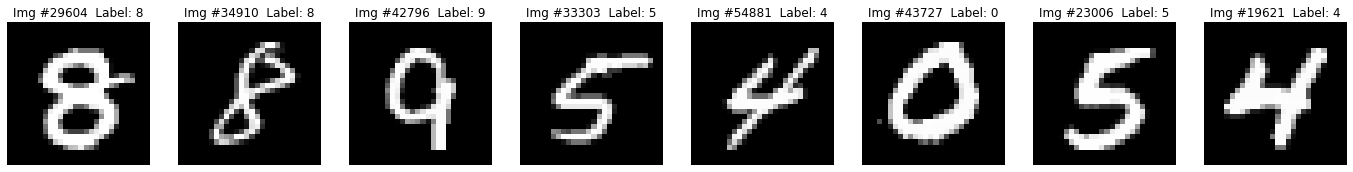

In [53]:
import matplotlib.pyplot as plt

N_IMGS = 8
fig, ax = plt.subplots(1,N_IMGS)
fig.set_size_inches(3 * N_IMGS, 3)

ids = np.random.randint(low=0, high=len(train_dataset), size=N_IMGS)

for i, n in enumerate(ids):
    img = train_dataset[n][0].numpy().reshape(28,28)
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(f"Img #{n}  Label: {train_dataset[n][1]}")
    ax[i].axis("off")
plt.show()

### Data Loaders

With our dataset object we can iterate over the Dataset by sampling images and their corresponding targets. <br>
However, this is somewhat cumbersone and does nto scale too well.<br>

In practice, we use Data Loaders, which provide an efficient way to iterate a Dataset object. 

 - https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [61]:
BATCH_SIZE = 64
SHUFFLE_TRAIN = True

In [62]:
train_loader =  torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=SHUFFLE_TRAIN
    )

eval_loader =  torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False
    )

In [63]:
imgs, labels = next(iter(eval_loader))
print(f"{imgs.shape = }")
print(f"{labels.shape = }")

imgs.shape = torch.Size([64, 1, 28, 28])
labels.shape = torch.Size([64])


In [64]:
for i, (imgs, labels) in enumerate(eval_loader):
    print(f"Iterating batch #{i+1}, which has {len(labels)} elements")
    if i > 10:
        break

Iterating batch #1, which has 64 elements
Iterating batch #2, which has 64 elements
Iterating batch #3, which has 64 elements
Iterating batch #4, which has 64 elements
Iterating batch #5, which has 64 elements
Iterating batch #6, which has 64 elements
Iterating batch #7, which has 64 elements
Iterating batch #8, which has 64 elements
Iterating batch #9, which has 64 elements
Iterating batch #10, which has 64 elements
Iterating batch #11, which has 64 elements
Iterating batch #12, which has 64 elements


## 4.2 Fully Connected Networks and Multi-Layer Perceptron

Let's now implement our first neural networks. We will implement fully connected networks (or MLPs if they have over one layer) for classification.

<img src="imgs/MLP.png" width="20%"> <span style="width: 300px"></span> <img src="imgs/softmax.png" width="48%'">

In [65]:
import torch.nn as nn

In [66]:
class Model(nn.Module):
    """
    MLP composed of two fully connected layers.
     - First layer takes pixel values and maps them to a hidden dimension
     - Nonlinear activation
     - Second layer maps from hidden dimension to number of classes, predicting a score for each of the classes
    """
    def __init__(self, input_dim=784, hidden_dim=128, output_dim=10):
        """ Model initalizer """
        super().__init__()
        self.layers = nn.Sequential(
                nn.Linear(in_features=input_dim, out_features=hidden_dim),
                nn.ReLU(),
                nn.Linear(in_features=hidden_dim, out_features=output_dim)
            )
        
    def forward(self, x):
        """ Forward pass through the model"""
        assert len(x.shape) == 2, f"ERROR! Shape of input must be 2D (b_size, dim)"
        pred = self.layers(x)
        return pred

def count_model_params(model):
    """ Counting the number of learnable parameters in a nn.Module """
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return num_params

In [67]:
model = Model(input_dim=784, hidden_dim=128, output_dim=10)
print(model)

Model(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [70]:
imgs, labels = next(iter(eval_loader))      # sampling images
flattened_imgs = imgs.flatten(start_dim=1)  # reshaping to desired size
output = model(flattened_imgs)              # forward pass through model

print(f"Imgs shape:         {imgs.shape}")
print(f"Model input shape:  {flattened_imgs.shape}")
print(f"Model output shape: {output.shape}")

Imgs shape:         torch.Size([64, 1, 28, 28])
Model input shape:  torch.Size([64, 784])
Model output shape: torch.Size([64, 10])


## 4.3 Training the Model

In [71]:
from tqdm import tqdm

In [72]:
NUM_EPOCHS = 10
LR = 3e-4

In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model(input_dim=784, hidden_dim=128, output_dim=10)
model = model.to(device)

In [74]:
criterion = nn.CrossEntropyLoss()  # already includes a Softmax!
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [75]:
loss_list = []

for epoch in range(NUM_EPOCHS):
    progress_bar = tqdm(train_loader, total=len(train_loader))
    for i, (imgs, labels) in enumerate(progress_bar):
        # using GPU
        imgs, labels = imgs.to(device), labels.to(device)
    
        # forward pass
        flattened_imgs = imgs.flatten(start_dim=1)
        preds = model(flattened_imgs)
    
        # computing error
        loss = criterion(preds, labels)
        loss_list.append(loss.item())

        # removing accumulated gradients
        optimizer.zero_grad()
    
        # backprogating error to compute gradients
        loss.backward()
    
        # updating arameters
        optimizer.step()
    
        if(i % 100 == 0 or i == len(train_loader) - 1):
            progress_bar.set_description(f"Epoch {epoch + 1} Iter {i + 1}: loss {loss.item():.5f}. ")

Epoch 10 Iter 938: loss 0.09259. : 100%|██████████| 938/938 [00:04<00:00, 207.65it/s]


In [76]:
def smooth(f, K=5):
    """ Smoothing a function using a low-pass filter (mean) of size K """
    kernel = np.ones(K) / K
    f = np.concatenate([f[:int(K//2)], f, f[int(-K//2):]])  # to account for boundaries
    smooth_f = np.convolve(f, kernel, mode="same")
    smooth_f = smooth_f[K//2: -K//2]  # removing boundary-fixes
    return smooth_f

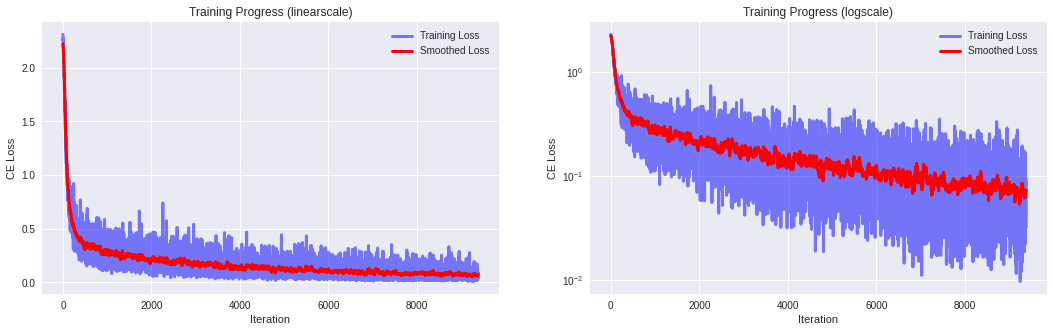

In [77]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,5)

smooth_loss = smooth(loss_list, 31)
ax[0].plot(loss_list, c="blue", label="Training Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress (linearscale)")

ax[1].plot(loss_list, c="blue", label="Training Loss", linewidth=3, alpha=0.5)
ax[1].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("CE Loss")
ax[1].set_yscale("log")
ax[1].set_title("Training Progress (logscale)")

plt.show()

## 4.4 Evaluating Trained Model

In [83]:
n_correct = 0

with torch.no_grad():
    progress_bar = tqdm(enumerate(eval_loader), total=len(eval_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        flattened_imgs = imgs.flatten(start_dim=1)
        preds = model(flattened_imgs)
        
        pred_labels = torch.argmax(preds, dim=-1)
        cur_correct = len(torch.where(pred_labels == labels)[0])
        n_correct = n_correct + cur_correct

accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")

100%|██████████| 157/157 [00:00<00:00, 235.90it/s]

Test accuracy: 97.32%


## Saving and Loading Model Checkpoints

In [79]:
import os

In [81]:
if(not os.path.exists("models")):
    os.makedirs("models")
savepath = f"models/checkpoint_epoch_{epoch}.pth"

torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, savepath)

In [82]:
model = Model()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

checkpoint = torch.load(savepath)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint["epoch"]

# Groups

# Assignment 1

- Train and Evaluate an MLP Classifier on the FashionMNIST dataset using PyTorch
- Draw learning curves (train/eval loss, train/eval classification accuracy) and confusion matrix
- Use *Optuna* to optimize (at least) two hyper-parameters (e.g, number of layers or hidden dimension) and show me some nice optimization plots :) 
- Visualize the norm of the gradients for some parameters during training, i.e., how the error decreases for some parameters as the model learns

#### **Deadline**: Wednesady 16th at 23:59

#### **Next Session**: Friday 18th at 10:00

## References:
 - https://pytorch.org/docs/stable/index.html
 - https://pytorch.org/docs/stable/autograd.html#
 - https://pytorch.org/docs/stable/nn.html
 - http://cs231n.stanford.edu/
 - http://neuralnetworksanddeeplearning.com/

<div class=alert style="background-color:#F5F5F5; border-color:#C8C8C8">
    <b>Angel Villar-Corrales</b><br>
    <ul>
       <li> <b>Email</b>: villar@ais.uni-bonn.de
       <li> <b>Website</b>: angelvillarcorrales.com
    </ul>
</div> 